In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

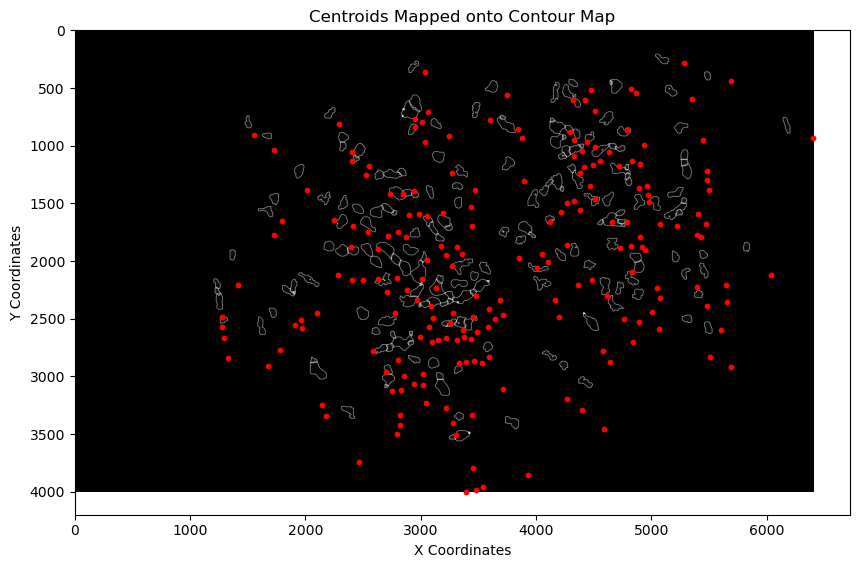

In [6]:

# Load the PNG contour map image
contour_image_path = r'E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Map.png'
contour_image = cv2.imread(contour_image_path)

with Image.open(contour_image_path) as img:
    png_width, png_height = img.size


# Convert BGR to RGB for proper color display in Matplotlib
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

# Load the CSV data
csv_path = r'E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Traces-props.csv'
centroids = pd.read_csv(csv_path)

max_centroid_x = centroids['CentroidX'].max()
max_centroid_y = centroids['CentroidY'].max()

scaling_factor_x = png_width / max_centroid_x
scaling_factor_y = png_height / max_centroid_y

#centroids['CentroidY'] = png_height - centroids['CentroidY']

# Apply the scaling to the centroid coordinates
centroids['CentroidX'] = centroids['CentroidX'] * scaling_factor_x
centroids['CentroidY'] = centroids['CentroidY'] * scaling_factor_y

# Extract CentroidX and CentroidY columns for plotting
xs = centroids['CentroidX']
ys = centroids['CentroidY']

# Plot the image with centroids
plt.figure(figsize=(10, 10))
plt.imshow(contour_image_rgb)
plt.scatter(xs, ys, c='red', s=10)  # Adjust 's' for the size of the centroid markers
plt.title("Centroids Mapped onto Contour Map")
plt.xlabel("X Coordinates")
plt.ylabel("Y Coordinates")
plt.show()

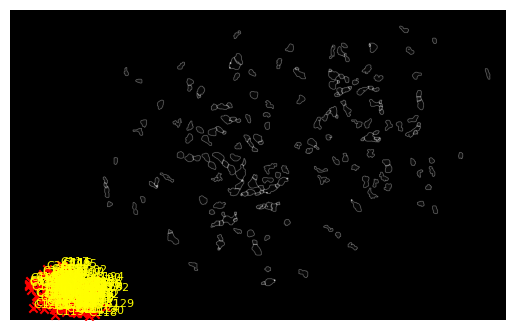

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# Read the CSV data into a DataFrame
df = pd.read_csv('E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Traces-props.csv')

# Read the image
img = Image.open('E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Map.png')

# Get image dimensions
width, height = img.size

# Plot the image
plt.imshow(img)

# Adjust Y coordinates (invert Y-axis)
df['AdjustedY'] = height - df['CentroidY']

# Plot the centroids
plt.scatter(df['CentroidX'], df['AdjustedY'], color='red', marker='x')

# Optional: Add labels to the centroids
for idx, row in df.iterrows():
    plt.text(row['CentroidX'], row['AdjustedY'], row['Name'], color='yellow', fontsize=8)

# Hide axes
plt.axis('off')

# Show the plot
plt.show()


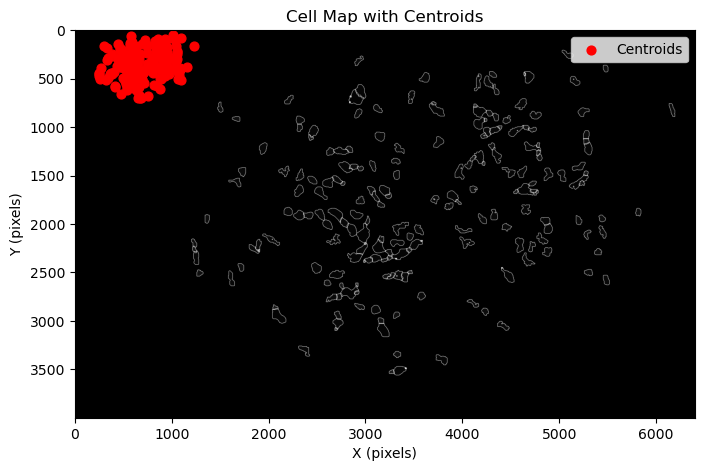

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

# Load your cell map
cell_map = np.array(Image.open('E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Map.png'))

# Load your CSV file with centroids
centroid_data = pd.read_csv('E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Traces-props.csv')

# Extract the Centroid X and Y columns
centroid_x = centroid_data['CentroidX'].values
centroid_y = centroid_data['CentroidY'].values

# Create a plot
plt.figure(figsize=(8, 8))

# Display the cell map
plt.imshow(cell_map, cmap='gray')  # Change cmap if your cell map is not grayscale

# Plot the centroids
plt.scatter(centroid_x, centroid_y, c='red', s=40, label='Centroids')

# Add labels, legends, etc.
plt.title('Cell Map with Centroids')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.legend()

# Show the plot
plt.show()


In [24]:
cell_map.shape

(4000, 6400, 3)

In [25]:
cell_map[95][935]

array([0, 0, 0], dtype=uint8)

In [26]:
cell_map.sum()

189594774

In [27]:
cell_map.max()

255

In [30]:
white_pixel_indices = np.where(np.all(cell_map == [255, 255, 255], axis=-1))

In [31]:
white_pixel_indices

(array([ 206,  206,  206, ..., 3558, 3558, 3558], dtype=int64),
 array([5032, 5033, 5034, ..., 3345, 3346, 3347], dtype=int64))

In [33]:
white_pixel_y = white_pixel_indices[0]  # Y-coordinates (row indices)
white_pixel_x = white_pixel_indices[1]  # X-coordinates (column indices)

# Print or check the first few matching indices
print(f"White pixel Y coordinates: {white_pixel_y[:5]}")
print(f"White pixel X coordinates: {white_pixel_x[:5]}")

White pixel Y coordinates: [206 206 206 206 206]
White pixel X coordinates: [5032 5033 5034 5035 5036]


In [12]:
cell_map[437][244]

array([0, 0, 0], dtype=uint8)

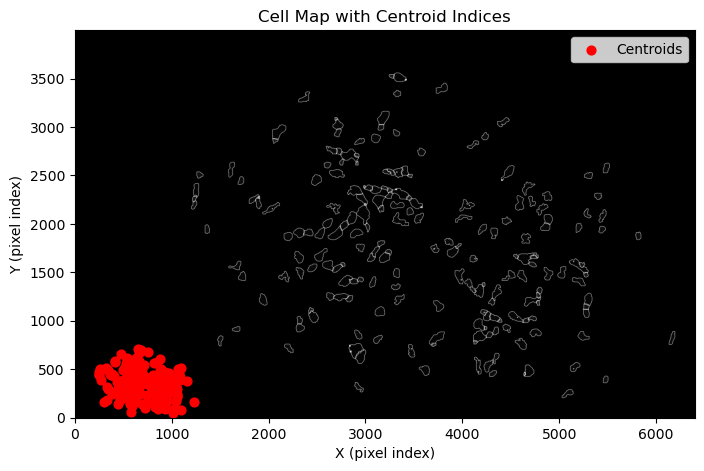

In [13]:
# Extract Centroid X and Y (these are indices, not coordinates)
centroid_x = centroid_data['CentroidX'].values
centroid_y = centroid_data['CentroidY'].values

# Create a plot
plt.figure(figsize=(8, 8))

# Display the cell map
plt.imshow(cell_map, cmap='gray')

# Plot the centroids on the cell map
plt.scatter(centroid_x, centroid_y, c='red', s=40, label='Centroids')

# Add labels and a legend
plt.title('Cell Map with Centroid Indices')
plt.xlabel('X (pixel index)')
plt.ylabel('Y (pixel index)')
plt.legend()

# Invert Y-axis to match image coordinates (if necessary)
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [47]:
# Load your cell map
cell_map = np.array(Image.open('E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Map.png'))

# Load your CSV file with centroids
centroid_data = pd.read_csv('E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Traces-props.csv')

# Extract the Centroid X and Y columns
centroid_x = centroid_data['CentroidX'].values
centroid_y = centroid_data['CentroidY'].values

In [45]:
cell_map.sum()

189594774

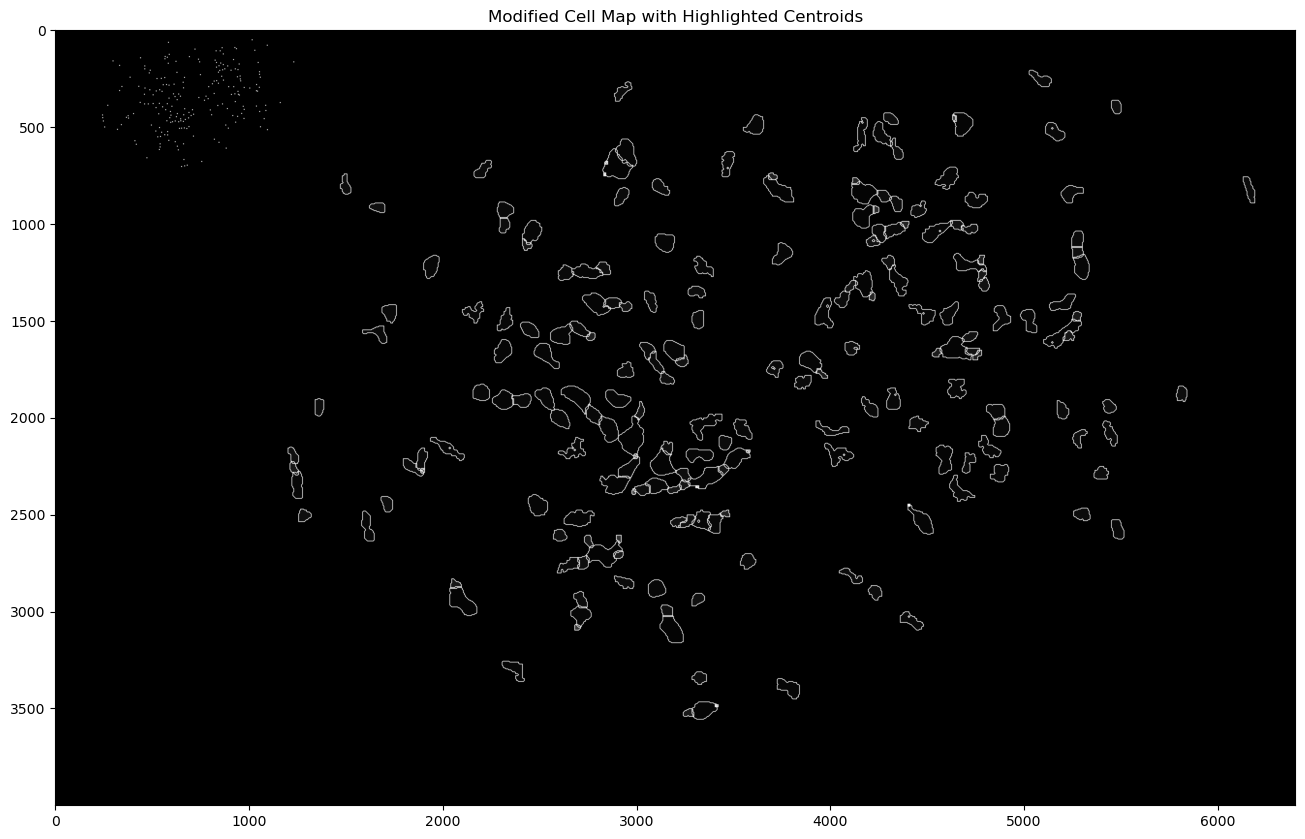

In [48]:
# Change the pixel values at these indices to [255, 255, 255] (white)
for x, y in zip(centroid_x, centroid_y):
    if 0 <= y < cell_map.shape[0] and 0 <= x < cell_map.shape[1]:
        cell_map[y-2:y+3, x-2:x+3] = [255, 255, 255]

# Now, plot the modified cell map
plt.figure(figsize=(16, 16))
plt.imshow(cell_map)
plt.title('Modified Cell Map with Highlighted Centroids')
#plt.gca().invert_yaxis()
plt.show()

In [43]:
cell_map.sum()

193534524

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [35]:
# Replace 'cell_map1.png' and 'cell_map2.png' with your actual file names
img1 = cv2.imread('E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Map.png')
img2 = cv2.imread('E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Cell_Map_0183.png')


In [36]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


In [7]:
# Apply a binary threshold to highlight the cell outlines
_, binary1 = cv2.threshold(gray1, 127, 255, cv2.THRESH_BINARY)
_, binary2 = cv2.threshold(gray2, 127, 255, cv2.THRESH_BINARY)


In [9]:
# Define a kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Apply closing to fill small holes in the outlines
closed1 = cv2.morphologyEx(binary1, cv2.MORPH_CLOSE, kernel)
closed2 = cv2.morphologyEx(binary2, cv2.MORPH_CLOSE, kernel)


In [37]:
# Use connected components to label the cells
num_labels1, labels_im1 = cv2.connectedComponents(gray1)
num_labels2, labels_im2 = cv2.connectedComponents(gray2)


In [38]:
num_labels1

122

In [39]:
num_labels2

304

In [40]:
# Initialize a list to store overlapping cell pairs
overlapping_cells = []

# Iterate over each cell in the first image
for label2 in range(1, num_labels2):
    # Create a mask for the current cell
    mask2 = (labels_im2 == label2).astype(np.uint8)

    # Check for overlap with cells in the second image
    overlap = cv2.bitwise_and(mask2, (labels_im1 > 0).astype(np.uint8))

    # Find labels of overlapping cells in the second image
    overlapping_labels1 = np.unique(labels_im1[overlap == 1])

    # Exclude background label (0)
    overlapping_labels1 = overlapping_labels1[overlapping_labels1 != 0]

    if overlapping_labels1.size > 0:
        overlapping_cells.append((label2, overlapping_labels1.tolist()))
        print(f"Cell {label2} in image 2 overlaps with cells {overlapping_labels1.tolist()} in image 1")


Cell 9 in image 2 overlaps with cells [1] in image 1
Cell 15 in image 2 overlaps with cells [4] in image 1
Cell 16 in image 2 overlaps with cells [5] in image 1
Cell 18 in image 2 overlaps with cells [6] in image 1
Cell 19 in image 2 overlaps with cells [7] in image 1
Cell 20 in image 2 overlaps with cells [9] in image 1
Cell 21 in image 2 overlaps with cells [5] in image 1
Cell 23 in image 2 overlaps with cells [8] in image 1
Cell 26 in image 2 overlaps with cells [9] in image 1
Cell 27 in image 2 overlaps with cells [10] in image 1
Cell 33 in image 2 overlaps with cells [11] in image 1
Cell 35 in image 2 overlaps with cells [12] in image 1
Cell 36 in image 2 overlaps with cells [10] in image 1
Cell 38 in image 2 overlaps with cells [10] in image 1
Cell 39 in image 2 overlaps with cells [13] in image 1
Cell 41 in image 2 overlaps with cells [14] in image 1
Cell 42 in image 2 overlaps with cells [17, 27] in image 1
Cell 43 in image 2 overlaps with cells [18] in image 1
Cell 46 in image

In [42]:
# Create an empty image to display overlaps
overlap_display = np.zeros_like(gray2)

# Assign a color to overlapping regions
for labels2, label1 in overlapping_cells:
    # Mask for the cell in image 1
    mask1 = (labels_im1 == label1).astype(np.uint8)

    # Mask for overlapping cells in image 2
    mask2 = np.isin(labels_im2, labels2).astype(np.uint8)

    # Combine masks to get the overlapping region
    overlap_region = cv2.bitwise_and(mask1, mask2)

    # Highlight the overlapping region in the display image
    overlap_display[overlap_region > 0] = 255  # You can change the value for different visualization

# Save or display the result
cv2.imwrite('overlapped_cells.png', overlap_display)
# Or to display using OpenCV (will open a window)
# cv2.imshow('Overlapped Cells', overlap_display)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


ValueError: operands could not be broadcast together with shapes (4000,6400) (2,) 